### 목표
- 타이타닉 데이터를 모델에 학습시켜서 생존/사망 예측해보자
- 머신러닝의 전체 과정을 진행해보자

#### 1. 문제 정의
- Kaggle에서 제공하는 타이타닉 데이터를 사용해 승객의 생존 여부 예측
- 지도 학습
- Survived 컬럼은 데이터값은 수치형이지만 0,1로 생존 여부만 구분하고 있기 때문에 우선순위는 없음
  |

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns # 시각화 도구

#### 2. 데이터 수집
- 타이타닉 train 데이터와 test 데이터를 변수 train, test에 저장하기

In [2]:
train = pd.read_csv('data/train.csv', index_col= 'PassengerId')
test = pd.read_csv('data/test.csv', index_col= 'PassengerId')

train.head()
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
# 크기 확인
print(train.shape)
print(test.shape)

(891, 11)
(418, 10)


#### 3. 데이터 전처리 및 데이터 탐색

In [4]:
# 훈련 데이터셋 정보 확인
train.info()

#결측치가 있는 

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
#컬럼 정보 관리
train.columns

'''
Pclass : 객실의 등급(1, 상위, 2:중상위, 3하위층)
SibSp : 형제자매/ 배우자(동승한)
Parch : 부모/자식(동승한)
Ticket : 티켓번호
Fare : 요금
Cabin : 객실 번호
Embarked : (S, C, Q)
'''

'\nPclass : 객실의 등급(1, 상위, 2:중상위, 3하위층)\nSibSp : 형제자매/ 배우자(동승한)\nParch : 부모/자식(동승한)\nTicket : 티켓번호\nFare : 요금\nCabin : 객실 번호\nEmbarked : (S, C, Q)\n'

In [6]:
test.info()
# Survived 컬럼 없음
# 결측치가 있는 컬럼; Age, Fare, Cabin
# 필요시 인코딩



<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


##### 결측치 채우기
- train : Age, Cabin, Embarked
- test : Age, Fare, Cabin

In [7]:
# 겶측치를 채우는 방법
# 1. 결측치가 있는 행 전체를 삭제하는 방법
# > 삭제하려는 데이터가 너무 많거나, 모델링에 치명적이지 않은 데이터여야만 한다.
# > 데이터가 많을수록 과대적합을 피할 수 있는데, 삭제해버리면 학습할 데이터가 줄어들어버림

# 2. 결측치를 다른 값(대표값)으로 대체하는 방법
# > 평균, 최빈값, 중앙값


- train  - Embarked 컬럼 결측치 채우기

In [8]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [9]:
# Embarked 컬럼의 결측치는?
train['Embarked'].isnull().sum() #1 or 0

2

In [10]:
# 결측치가 있는 데이터 출력
train[train['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [11]:
# fillna('값')
# 비어있는 데이터가 있다면, '값'으로 채워주는 함수
train['Embarked'].fillna('S')

PassengerId
1      S
2      C
3      S
4      S
5      S
      ..
887    S
888    S
889    S
890    C
891    Q
Name: Embarked, Length: 891, dtype: object

In [12]:
train['Embarked'] = train['Embarked'].isnull().sum() #최빈값으로 결측치 처리

train['Embarked'].isnull().sum()  #남은 결측치 없음


0

- test : Fare 컬럼의 결측치를 채우기

In [13]:
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [14]:
# 상관관계 확인
test.corr(numeric_only = True) # 숫자 컬럼 포함

# 상관 계수 : -1 ~ 1 범위로 표현됨
# -1 or 1에 가까울수록 해당 컬럼과 상관관계가 높다.
# 0에 가까울수록 해당 컬럼과 상관이 없음



,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,-0.577147,0.337932,0.171539,0.230046,1.000000


In [15]:
train.corr(numeric_only = True)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,NaN
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,NaN
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,NaN
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,NaN
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,NaN
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,NaN
Embarked,NaN,NaN,NaN,NaN,NaN,NaN,NaN


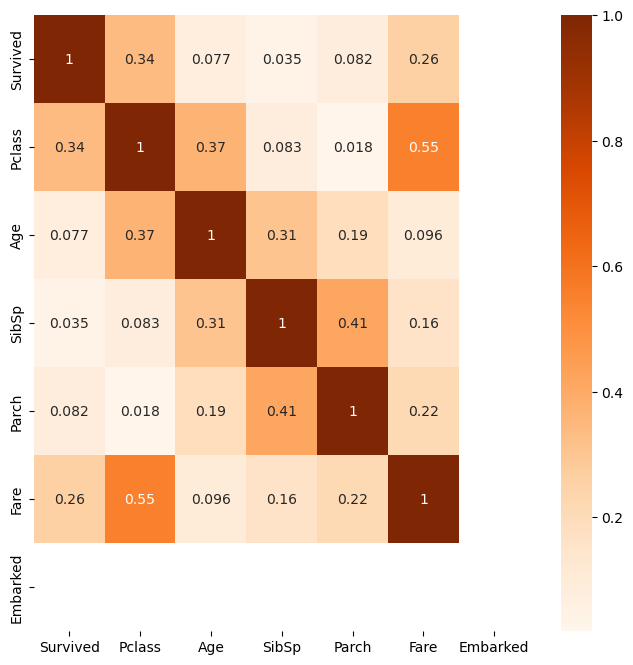

In [16]:
#히트맵 표현
plt.figure(figsize=(8,8))
sns.heatmap(train.corr(numeric_only = True).abs(), annot = True, cmap ='Oranges') #절대값 abs
plt.show()

In [17]:
#train Pclass 컬럼
train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [18]:
# 객실등급 기준으로 그룹화 groupby(), 요금 컬럼 집계함수 중앙값 medean()

train[['Pclass', 'Fare']].groupby('Pclass').median()

,Fare
Pclass,
1,60.2875
2,14.2500
3,8.0500


In [19]:
# Pclass, Sex을 기준으로 그룹핑하여 Fare의 중앙값 확인

train[['Pclass','Sex', 'Fare']].groupby(['Pclass', 'Sex']).median()

Fare
Pclass Sex             
1      female  82.66455
       male    41.26250
2      female  22.00000
       male    13.00000
3      female  12.47500
       male     7.92500

In [20]:
# 결측치가 있는 행 확인
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [21]:
#fillna를 사용해서 결측치 채우기
test['Fare'] = test['Fare'].fillna(7.925)

test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


- train, test Age 채우기
    - 위에서 사용했던 Pclass, Sex 컬럼을 Grouping해서 Age의 집계를 확인하고 채워보자.

In [22]:
# 평균값을 쓸지, 중앙값을 쓸지 판단을 위해 Age 컬럼의 기술통계량 확인
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [23]:
# Age는 Pclass와 상관관계가 높았음
# Pclass, Sex을 그룹핑하여 Age의 평균 출력
gb1 = train[['Pclass', 'Sex', 'Age']].groupby(['Pclass', 'Sex']).mean()
gb1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [24]:
# gb1 - index 2개 - Pclass, Sex

# ★멀티인덱스에서의 데이터 접근 

# 2등석, 남성: 평균 나이
gb1.loc[(2,'male'), : ]
gb1.loc[(2,'male')]

Age    30.740707
Name: (2, male), dtype: float64

In [25]:
# train Age 결측치가 있는 행 출력
train[train['Age'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,2
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,2
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,2
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,2
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,2
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,2
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,2


In [26]:
gb1.loc[(2,'male')]

Age    30.740707
Name: (2, male), dtype: float64

In [27]:
gb1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [28]:
# 규칙에 맞게 Pclass와 Sex에 따른 Age값 반환하는 함수
def fill_age(row):
    #row : 받아오는 행의 데이터 (매개변수)

    # 만약 Age컬럼이 결측치라면 gb1 테이블의 값을 인덱싱
    if np.isnan(row['Age']):
        return gb1.loc[(row['Pclass'],row['Sex'])] #.iloc[0]

    # 결측치가 아니라면 ~ 원래 나이 값을 사용
    else:
        return row['Age']

In [29]:
train['Age'] = train.apply(fill_age, axis = 1).astype(np.int64)

train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 83.5+ KB


C:\Users\smhrd1\AppData\Local\Temp\ipykernel_2684\1129430468.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  train['Age'] = train.apply(fill_age, axis = 1).astype(np.int64)


In [30]:
test['Age'] = test.apply(fill_age, axis = 1).astype(np.int64)

test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


C:\Users\smhrd1\AppData\Local\Temp\ipykernel_2684\2238907546.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test['Age'] = test.apply(fill_age, axis = 1).astype(np.int64)


## 정리
- apply, fill_age
- 테스트 데이터를 행단위로 쪼갠 것을 매개변수로 내줘서 안쪽 로직이 동작하도록 만듦.
- 결과값으로 Age를 채울 수 있는 대표값(gb1?) 반환
- 정수형(astype int)으로 반환해서 데이터의 'Age' 컬럼에 넣어줌

- train, test Cabin 채우기
    - Cabin 컬럼 데이터 확인
    - 임의의 값으로 결측치를 채울 예정

In [235]:
# train 기준으로 데이터 확인
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Family_Size,Family_group
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,2,M,2,Small
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,2,C,2,Small
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,2,M,1,Alone
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,2,C,2,Small
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,2,M,1,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,2,M,1,Alone
888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,2,B,1,Alone
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21,1,2,W./C. 6607,23.4500,2,M,4,Small


In [32]:
train['Cabin'].info()

#타이타닉 호는 A, B, C ... 층으로 표기를 한다. #알파벳만 뽑아서 사용

<class 'pandas.core.series.Series'>
Index: 891 entries, 1 to 891
Series name: Cabin
Non-Null Count  Dtype 
--------------  ----- 
204 non-null    object
dtypes: object(1)
memory usage: 13.9+ KB


In [33]:
# 우선 임의의 값으로 train, test의 Cavin 결측치를 채워보자
# 'M'
train['Cabin'] = train['Cabin'].fillna('M')
test['Cabin'] = test['Cabin'].fillna('M')

In [34]:
train['Cabin'].info()

<class 'pandas.core.series.Series'>
Index: 891 entries, 1 to 891
Series name: Cabin
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 13.9+ KB


In [35]:
# 첫글자 알파벳 1개만 추출하기
train['Deck'] = train['Cabin'].str[0]
#str : 데이터 내부 문자열에 접근

test['Deck'] = test['Cabin'].str[0]

# 컬럼 확인
train.columns, test.columns

(Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
        'Fare', 'Cabin', 'Embarked', 'Deck'],
       dtype='object'),
 Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
        'Cabin', 'Embarked', 'Deck'],
       dtype='object'))

In [36]:
# Cabin 컬럼 삭제
# .drop([컬럼명1, 컬럼명2], axis= , inplace = )
# axis = 0, 행 삭제
# axis = 1, 열 삭제

train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [37]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    int64  
 10  Deck      891 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 83.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    i

- Deck 시각화

C:\Users\smhrd1\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\smhrd1\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


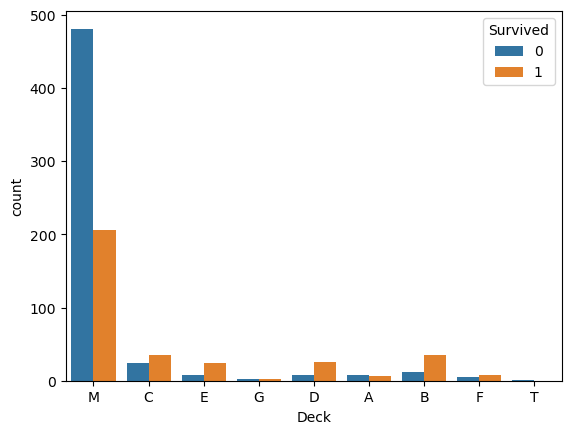

In [38]:
# sns 시각화 도구를 사용해서 범주형 데이터 Deck을 시각화해보자

sns.countplot(data = train, x='Deck', hue='Survived')
#countplot 개수 시각화
# x : x축
# hue : 분할 기준(나타내고자 하는 것)
plt.show()

In [39]:
# M층에서는 상대적으로 사망률이 높음 (0 = 사망률)
# 결측치 = 죽었기 때문에...!
# M은 임의로 채워놓은 값이기 때문에 다른 컬럼 참고

C:\Users\smhrd1\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\smhrd1\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


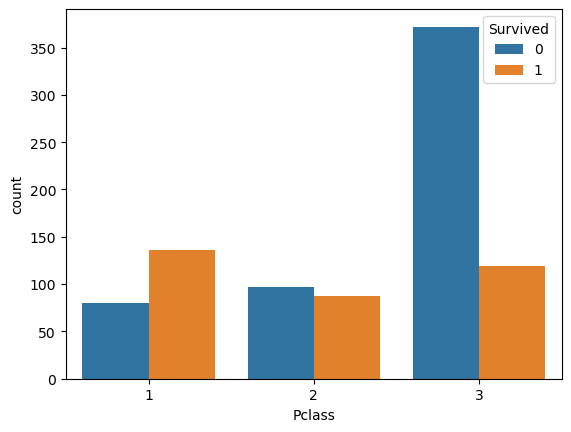

In [40]:
# Pclass가 사망에 얼마나 영향을 미쳤는지 시각화
sns.countplot(train, x = 'Pclass', hue = 'Survived')
plt.show()

- Deck과 Pclass 시각화
- x축 : Deck, hue : Pclass

C:\Users\smhrd1\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\smhrd1\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\smhrd1\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


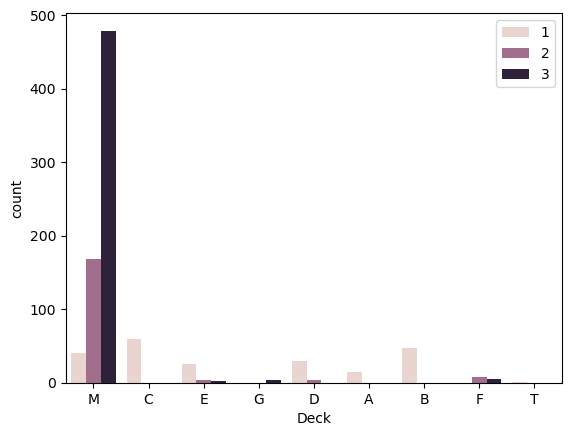

In [41]:
sns.countplot(data = train, x = 'Deck', hue='Pclass')
plt.legend()
plt.show()

In [42]:
# M층은 객실 등급 3등석인 경우가 대부분임
# 그래서 상대적으로 사망률 높았음
# m층 = Pclass가 3
# M이라는 데이터는 더이상 신경쓰지 않음. 3등석이기 때문에 사망률 높았음


- 성별에 따른 생존/사망 시각화

C:\Users\smhrd1\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\smhrd1\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


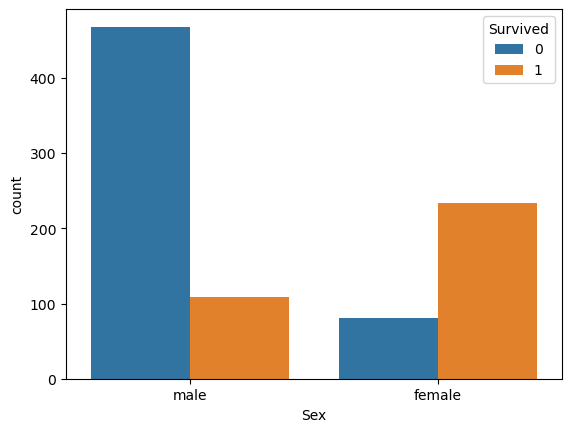

In [43]:
sns.countplot(data = train, x = 'Sex', hue = 'Survived')
plt.show()

C:\Users\smhrd1\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\smhrd1\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


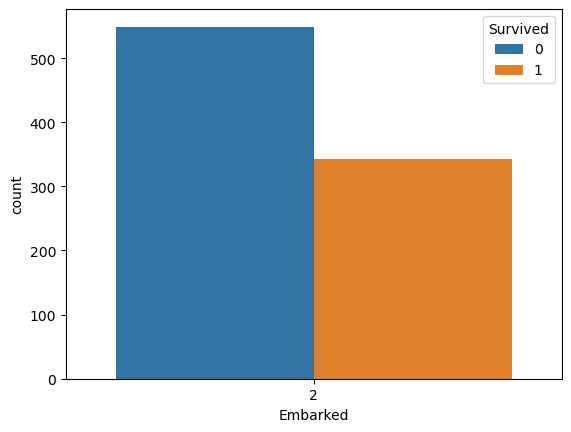

In [44]:
sns.countplot(data = train, x = 'Embarked', hue = 'Survived')
plt.show()

C:\Users\smhrd1\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\smhrd1\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\smhrd1\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


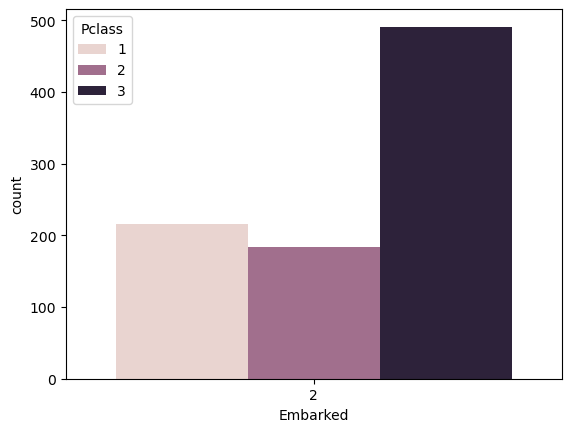

In [45]:
# S 승선항에서 Pclass가 3인 사람이 많이 탄 건 아닌가?
sns.countplot(data = train, x = 'Embarked', hue = 'Pclass')
plt.show()

C:\Users\smhrd1\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\smhrd1\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


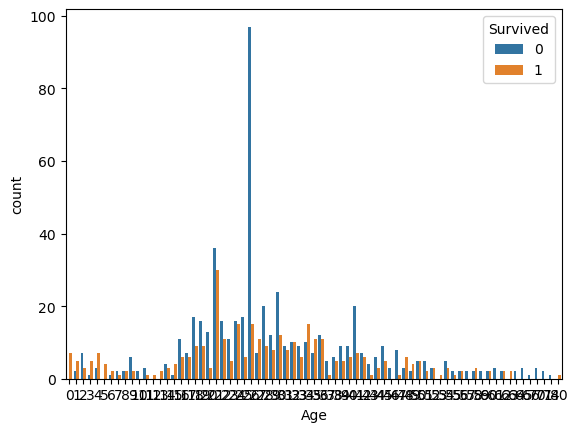

In [46]:
sns.countplot(data = train, x = 'Age', hue='Survived')
plt.show()

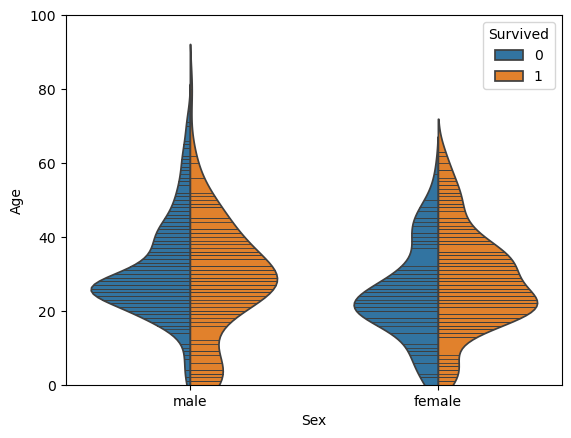

In [47]:
# 나이 데이터를 countplot으로 시각화했더니 해석하기가 힘듦

#violinplot을 활용 : 수치형 데이터의 분포를 확인할 때 사용하는 그래프
# 바이올린 형태로 데이터 분포와 밀도를 곡선으로 표현한 그래프
# 데이터 많이 존재하는 부분은 두껍게, 데이터가 적게 존재하는 부분은 얇게

# 성별과 나이에 따른 생존/사망자 수
sns.violinplot(
    data = train,
    x = 'Sex',
    y = 'Age',
    hue = 'Survived',
    split = True, #데이터를 양쪽에 나눠서 표현
    inner = 'stick' #바이올린 내부에 개별 데이터선
)

plt.ylim(0,100)
plt.show()

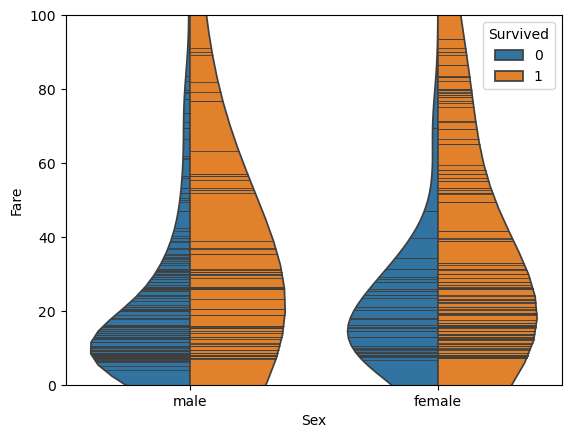

In [48]:

sns.violinplot(
    data = train,
    x = 'Sex',
    y = 'Fare',
    hue = 'Survived',
    split = True, #데이터를 양쪽에 나눠서 표현
    inner = 'stick' #바이올린 내부에 개별 데이터선
)

plt.ylim(0,100)
plt.show()

In [49]:
#성별 불문, 요금이 저렴한 사람들의 사망률이 높았음.

- 특성공학 : 새로운 컬럼 생성(transform)
   - Parch, Sibsp를 더해서 가족의 숫자라는 새로운 컬럼 생성
   - train, test 동일하게 적용

In [50]:
# train
train['Family_Size'] = train['Parch'] + train['SibSp'] + 1 # 본인 포함
train['Family_Size']

PassengerId
1      2
2      2
3      1
4      2
5      1
      ..
887    1
888    1
889    4
890    1
891    1
Name: Family_Size, Length: 891, dtype: int64

C:\Users\smhrd1\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\smhrd1\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


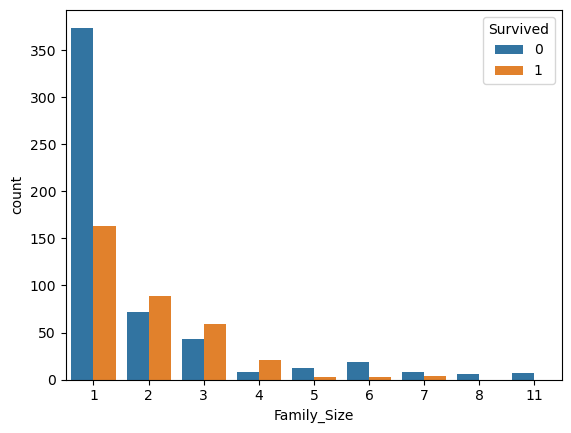

In [51]:
# 시각화
sns.countplot(data = train, x = 'Family_Size', hue = 'Survived')
plt.show()

In [52]:
# 1명일 경우, 사망률이 높다. - alone
# 2명 ~ 4명일 경우 생존율이 높음 - small
# 5명 이상일 경우, 사망률이 높음 - large

- 가족의 사이즈가 1이면 Alone, 2~4명이면 Small, 5명 이상이면 Large로 바꿔줌
- train, test 둘 다 변경

In [53]:
bins = [0, 1, 4, 11]
# (0, 1] -> 0 초과 1 이하
# (1, 4] -> 1 초과 4 이하
# (4, 11] -> 4 초과 11 이하

labels = ['Alone', 'Small', 'Large']

#cut : 연속적인 수치형 데이터를 일정 범위로 나누어줌 > 범주형
train['Family_group'] = pd.cut(train['Family_Size'], bins = [0, 1, 4, 11], labels = ['Alone', 'Small', 'Large'])

In [54]:
# test 데이터도 binning
train['Family_group'] = pd.cut(train['Family_Size'], bins = [0, 1, 4, 11], labels= labels)

C:\Users\smhrd1\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\smhrd1\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


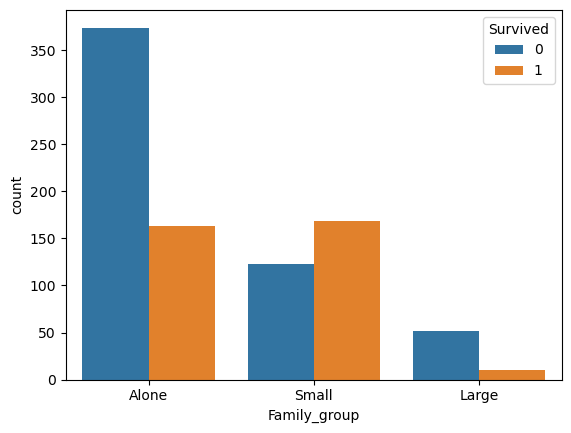

In [55]:
# Family_group 시각화 

sns.countplot(
    data = train,
    x = 'Family_group',
    hue = 'Survived'  
)
plt.show()

- 불필요한 컬럼 삭제
   - drop
   - 전처리 대상에서 제외된 컬럼과 특성공학 후 불필요해진 컬럼

In [56]:
train.info()

#삭제 대상
#전처리 후 필요없어진 컬럼
#전처리하지 않은 컬럼 중 불필요한 컬럼 (이름, 티켓 등)

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Name          891 non-null    object  
 3   Sex           891 non-null    object  
 4   Age           891 non-null    int64   
 5   SibSp         891 non-null    int64   
 6   Parch         891 non-null    int64   
 7   Ticket        891 non-null    object  
 8   Fare          891 non-null    float64 
 9   Embarked      891 non-null    int64   
 10  Deck          891 non-null    object  
 11  Family_Size   891 non-null    int64   
 12  Family_group  891 non-null    category
dtypes: category(1), float64(1), int64(7), object(4)
memory usage: 91.5+ KB


In [57]:
test.drop(['Name', 'Ticket', 'SibSp', 'Parch'], axis = 1, inplace = True)

In [58]:
train.shape, test.shape

((891, 13), (418, 6))

- train에는 정답데이터와 문제데이터가 하나의 프레임으로 들어가 있는 상태 (X_train, y_train)
- test는 정답을 제공하지 않음 (X_test)
  

In [59]:
X_train = train.drop('Survived', axis = 1)
y_train = train['Survived']

X_test = test

print(X_train.shape, y_train.shape)
print(X_test.shape)

(891, 12) (891,)
(418, 6)


- 범주형 데이터는 학습용으로 사용할 수 없으니, 수치형 변환
- Encoding
- 구분 용도를 위해 one-hot Encoding

In [60]:
X_train_one_hot = pd.get_dummies(X_train)
X_test_one_hot = pd.get_dummies(X_test)

In [61]:
X_train_one_hot.shape

(891, 1593)

In [62]:
X_test_one_hot.shape

(418, 16)

In [63]:
X_train_one_hot.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Family_Size',
       'Name_Abbing, Mr. Anthony', 'Name_Abbott, Mr. Rossmore Edward',
       'Name_Abbott, Mrs. Stanton (Rosa Hunt)',
       ...
       'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Deck_T',
       'Family_group_Alone', 'Family_group_Small', 'Family_group_Large'],
      dtype='object', length=1593)

In [64]:
X_test_one_hot.columns

Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M'],
      dtype='object')

- 특성 개수 맞추기
  - 부족한 컬럼명을 확인
  - Set() 집합 자료구조 활용해서 찾아보기


In [65]:
# set이라는 데이터 타입(집합 자료형)
set(X_train_one_hot.columns) - set(X_test_one_hot.columns)

{'Name_Ponesell, Mr. Martin',
 'Ticket_350050',
 'Name_Nicola-Yarred, Master. Elias',
 'Ticket_348121',
 'Name_Sage, Mr. Frederick',
 'Name_Daniel, Mr. Robert Williams',
 'Ticket_28551',
 'Ticket_PC 17473',
 'Ticket_4134',
 'Name_Laroche, Mr. Joseph Philippe Lemercier',
 'Ticket_W.E.P. 5734',
 'Name_Goodwin, Master. Harold Victor',
 'Name_Emir, Mr. Farred Chehab',
 'Ticket_342826',
 'Name_Goodwin, Mrs. Frederick (Augusta Tyler)',
 'Ticket_244252',
 'Name_Masselmani, Mrs. Fatima',
 'Name_McMahon, Mr. Martin',
 'Name_Hart, Mr. Benjamin',
 'Ticket_SOTON/OQ 3101316',
 'Ticket_315153',
 'Name_Lam, Mr. Len',
 'Ticket_370365',
 'Ticket_17764',
 'Ticket_PC 17609',
 'Name_Richards, Mrs. Sidney (Emily Hocking)',
 'Name_McNamee, Mr. Neal',
 'Ticket_8471',
 'Name_Bailey, Mr. Percy Andrew',
 'Ticket_347083',
 'Name_Lovell, Mr. John Hall ("Henry")',
 'Name_Mack, Mrs. (Mary)',
 'Ticket_113776',
 'Ticket_SC/PARIS 2131',
 'Name_Johnston, Mr. Andrew G',
 'Ticket_315094',
 'Name_Turpin, Mrs. William John

In [66]:
# X_test에 Deck_T라는 컬럼을 새롭게 추가
X_test_one_hot['Deck_T'] = 0
X_test_one_hot['Deck_T']

PassengerId
892     0
893     0
894     0
895     0
896     0
       ..
1305    0
1306    0
1307    0
1308    0
1309    0
Name: Deck_T, Length: 418, dtype: int64

In [67]:
X_train_one_hot.info()
X_test_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Columns: 1593 entries, Pclass to Family_group_Large
dtypes: bool(1586), float64(1), int64(6)
memory usage: 1.4 MB
<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Age         418 non-null    int64  
 2   Fare        418 non-null    float64
 3   Sex_female  418 non-null    bool   
 4   Sex_male    418 non-null    bool   
 5   Embarked_C  418 non-null    bool   
 6   Embarked_Q  418 non-null    bool   
 7   Embarked_S  418 non-null    bool   
 8   Deck_A      418 non-null    bool   
 9   Deck_B      418 non-null    bool   
 10  Deck_C      418 non-null    bool   
 11  Deck_D      418 non-null    bool   
 12  Deck_E      418 non-null    bool   
 13  Deck_F      418 non-null    bool   
 14  Deck_G      418 non-null    bool   
 15  Deck_M      41

In [68]:
X_train_one_hot.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Family_Size',
       'Name_Abbing, Mr. Anthony', 'Name_Abbott, Mr. Rossmore Edward',
       'Name_Abbott, Mrs. Stanton (Rosa Hunt)',
       ...
       'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Deck_T',
       'Family_group_Alone', 'Family_group_Small', 'Family_group_Large'],
      dtype='object', length=1593)

In [89]:
# X_train과 X_test의 컬럼 순서가 다르다
# X_train 컬럼의 순서로 맞춰준다

# X_test_one_hot[['Pclass' ,'Age', 'Fare']]
# 변경 전: X_test_one_hot[X_train_one_hot.columns]
# 변경 후:  누락된 컬럼 보완을 위해 test 데이터에 train 컬럼 기준으로 정렬 + 누락 컬럼은 0으로 채움
X_test_one_hot_aligned = X_test_one_hot.reindex(columns=X_train_one_hot.columns, fill_value=0)


In [90]:
print(X_train_one_hot.shape, y_train.shape)
print(X_test_one_hot.shape)

(891, 1593) (891,)
(418, 17)


#### 모델 선택 및 학습

In [91]:
# 필요한 라이브러리 가져오기
from sklearn.tree import DecisionTreeClassifier
# 교차검증
from sklearn.model_selection import cross_val_score

In [92]:
# 모델 객체 생성
tree_model = DecisionTreeClassifier()

In [93]:
cv_result = cross_val_score(tree_model, X_train_one_hot, y_train, cv = 5)
cv_result

array([0.81005587, 0.79775281, 0.87078652, 0.82022472, 0.84831461])

In [94]:
cv_result.mean()
# 평균적으로 83%의 성능을 내고 있음
# test 데이터에서는 조금 더 정확도가 떨어질 수 있다.

0.8294269035214363

- tree model의 하이퍼 파라미터 조정

In [119]:
tree_model = DecisionTreeClassifier(max_depth= 9)
result = cross_val_score(tree_model, X_train_one_hot, y_train, cv = 5)

result

array([0.79329609, 0.80898876, 0.83707865, 0.81460674, 0.83707865])

In [120]:
result.mean()

0.8182097796748478

In [121]:
# 교차검증을 하면서 하이퍼 파라미터 조정 확인(1~9)
for md in range(1, 10):
    tree_model = DecisionTreeClassifier(max_depth = md)
    result = cross_val_score(tree_model, X_train_one_hot, y_train, cv=5) #cross_val_score는 교차검증
    print(f'depth : {md}', result, result.mean()) #mean = 평균

depth : 1 [0.80446927 0.80337079 0.78651685 0.75280899 0.78651685] 0.7867365513778168
depth : 2 [0.74860335 0.79213483 0.78651685 0.75280899 0.78651685] 0.773316176009039
depth : 3 [0.81564246 0.81460674 0.80337079 0.79213483 0.79775281] 0.8047015253279769
depth : 4 [0.77653631 0.8258427  0.81460674 0.79213483 0.82022472] 0.8058690603226413
depth : 5 [0.83240223 0.78089888 0.82022472 0.80337079 0.85393258] 0.8181658401858012
depth : 6 [0.82681564 0.80898876 0.8258427  0.79775281 0.84269663] 0.8204193082669009
depth : 7 [0.81564246 0.80337079 0.83146067 0.81460674 0.84831461] 0.8226790534178645
depth : 8 [0.80446927 0.82022472 0.83707865 0.80898876 0.84269663] 0.8226916075575922
depth : 9 [0.81005587 0.82022472 0.84269663 0.81460674 0.83707865] 0.8249325214989642


In [139]:
tree_model2 = DecisionTreeClassifier(max_depth=9)

#학습
tree_model2.fit(X_train_one_hot, y_train)

# 예측값
pre2 = tree_model2.predict(X_test_one_hot_aligned)

# 모델 답안지 작성 - tree_model_(num).csv 
result2 = pd.read_csv('data/gender_submission.csv')
result2['Survived'] = pre2

result2.to_csv('data/tree_model_01.csv', index = False)

In [173]:
X_train_one_hot

,Pclass,Age,SibSp,Parch,Fare,Embarked,Family_Size,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_M,Deck_T,Family_group_Alone,Family_group_Small,Family_group_Large
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,22,1,0,7.2500,2,2,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,1,38,1,0,71.2833,2,2,False,False,False,...,True,False,False,False,False,False,False,False,True,False
3,3,26,0,0,7.9250,2,1,False,False,False,...,False,False,False,False,False,True,False,True,False,False
4,1,35,1,0,53.1000,2,2,False,False,False,...,True,False,False,False,False,False,False,False,True,False
5,3,35,0,0,8.0500,2,1,False,False,False,...,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,27,0,0,13.0000,2,1,False,False,False,...,False,False,False,False,False,True,False,True,False,False
888,1,19,0,0,30.0000,2,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
889,3,21,1,2,23.4500,2,4,False,False,False,...,False,False,False,False,False,True,False,False,True,False


In [174]:
#tree_model2가 어떤 특성 중요하게 생각하는지
fi = tree_model2.feature_importances_rtances_
fi

array([0.10267343, 0.1020313 , 0.        , ..., 0.0052297 , 0.03525475,
       0.        ])

In [175]:
fi_s = pd.DataFrame(fi, index = X_train_one_hot.columns, columns= ['imp'])
    
fi_s

,imp
Pclass,0.102673
Age,0.102031
SibSp,0.000000
Parch,0.000000
Fare,0.082957
...,...
Deck_M,0.046450
Deck_T,0.000000
Family_group_Alone,0.005230
Family_group_Small,0.035255


<Figure size 500x500 with 0 Axes>

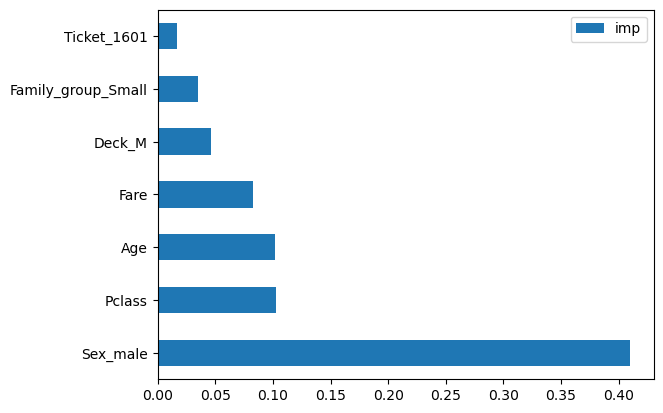

In [184]:
plt.figure(figsize = (5,5))
fi_s.sort_values(by='imp', ascending = False).head(7).plot.barh()
plt.show()

### 앙상블
- 여러 모델을 결합하는 방식으로 성능을 올리는 기법
1. 보팅(Voting)
   - 여러 다른 종류의 모델이 예측한 결과를 투표(분류) 혹은 평균(회귀)을 통해 최종 결정
     A. 하드보팅(Hard-Voting) : 다수결
     B. 소프트보팅(Soft-Voting) : 확률값을 통한 결정
2. 배깅(Bagging)
   - 여러 같은 종류의 모델이 예측한 결과를 투표(분류) 혹은 평균(회귀)을 통해 최종 결정
     A. RandomForest (Decision Tree를 여러개 사용하는 모델)
3. 부스팅(Boosting)
   - 여러 모델이 순차적으로 학습-예측하며 잘못 예측한 데이터에 가중치를 부여해 오류를 개선해나가면서 학습하는 방식
     - AdaBoost, GradientBoost, eXtremeGradientBoost, LightGradientBoost
     - 후속 모델이 이전 모델의 잘못된 예측을 수정하면서 성능이 점점 좋아지는 방식

In [186]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

### 랜덤포레스트

In [187]:
forest_model = RandomForestClassifier(n_estimators=100, #트리의 개수
                                     max_features= 5,각각의 트리가 선택할 특성개수의 최대
                                     max_depth=4,
                                     random_state=11)

In [188]:
#랜덤포레스트 모델 교차검증
result_RF = cross_val_score(forest_model,
                           X_train_one_hot,
                           y_train, 
                           cv=5)

result_RF

array([0.79888268, 0.80898876, 0.83707865, 0.81460674, 0.85955056])

In [189]:
result_RF.mean()

0.8238214801330738

In [190]:
ada_model = AdaBoostClassifier(n_estimators=100, random_state=14)

In [202]:
result_ada = cross_val_score(ada_model,
                             X_train_one_hot,
                             y_train,
                             cv = 5)
result_ada

C:\Users\smhrd1\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\smhrd1\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\smhrd1\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\smhrd1\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users

array([0.75977654, 0.80898876, 0.82022472, 0.81460674, 0.83146067])

In [204]:
voting_model = VotingClassifier(estimators=[('tree', tree_model2), 
                                            ('forest', forest_model), 
                                            ('ada', ada_model)],
                                            voting='soft')


voting_model

VotingClassifier(estimators=[('tree', DecisionTreeClassifier(max_depth=9)),
                             ('forest', RandomForestClassifier()),
                             ('ada', AdaBoostClassifier())],
                 voting='soft')

In [205]:
#교차검증
result_voting = cross_val_score(voting_model,
                               X_train_one_hot,
                               y_train,
                               cv = 5)

C:\Users\smhrd1\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\smhrd1\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\smhrd1\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\smhrd1\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users

In [206]:
result_voting.mean()

0.824938798568828

xgboos, lightbm

In [207]:
#xgboost 설치
!pip install xgboost

In [211]:
#light gbm 설치
! pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 15.2 MB/s eta 0:00:00


In [216]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [217]:
xg_model = XGBClassifier(n_estimators=100, random_state=13)

In [218]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 891 entries, 1 to 891
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 13.9 KB


In [221]:
result_xg = cross_val_score(xg_model,
                            X_train_one_hot,
                            y_train,
                            cv=5)
result_xg

array([0.79888268, 0.79775281, 0.85955056, 0.79213483, 0.84831461])

In [223]:
y_train = y_train.astype('str')
y_train.info()

<class 'pandas.core.series.Series'>
Index: 891 entries, 1 to 891
Series name: Survived
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 13.9+ KB


### LightBGM

In [232]:
lgb_model = LGBMClassifier(n_estimators=80, random_state=55)

In [234]:
result_lgb = cross_val_score(lgb_model,
                                X_train_one_hot,
                            y_train,
                            cv=5)
result_lgb.mean()

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\smhrd1\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\smhrd1\anaconda3\Lib\site-packages\lightgbm\sklearn.py", line 1560, in fit
    super().fit(
  File "C:\Users\smhrd1\anaconda3\Lib\site-packages\lightgbm\sklearn.py", line 1049, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\smhrd1\anaconda3\Lib\site-packages\lightgbm\engine.py", line 297, in train
    booster = Booster(params=params, train_set=train_set)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\smhrd1\anaconda3\Lib\site-packages\lightgbm\basic.py", line 3656, in __init__
    train_set.construct()
  File "C:\Users\smhrd1\anaconda3\Lib\site-packages\lightgbm\basic.py", line 2590, in construct
    self._lazy_init(
  File "C:\Users\smhrd1\anaconda3\Lib\site-packages\lightgbm\basic.py", line 2227, in _lazy_init
    return self.set_feature_name(feature_name)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\smhrd1\anaconda3\Lib\site-packages\lightgbm\basic.py", line 3046, in set_feature_name
    _safe_call(
  File "C:\Users\smhrd1\anaconda3\Lib\site-packages\lightgbm\basic.py", line 313, in _safe_call
    raise LightGBMError(_LIB.LGBM_GetLastError().decode("utf-8"))
lightgbm.basic.LightGBMError: Do not support special JSON characters in feature name.
